In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px


In [2]:
df = pd.read_csv('Salary Dataset.csv')
# df = pd.DataFrame()


Data Cleaning

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4341 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4342 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


In [4]:
df.dropna(subset=['Salaries Reported'], inplace=True)
df.loc[df['Company Name'].isna()]
df['Company Name']= df['Company Name'].fillna('Other')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4342 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4342 non-null   object 
 1   Job Title          4342 non-null   object 
 2   Salaries Reported  4342 non-null   float64
 3   Location           4342 non-null   object 
 4   Salary             4342 non-null   object 
dtypes: float64(1), object(4)
memory usage: 203.5+ KB


Statistical Insight

In [5]:
df.describe()

,Salaries Reported
count,4342.000000
mean,2.775910
std,5.146527
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,105.000000


In [6]:
df.describe(include='O')

,Company Name,Job Title,Location,Salary
count,4342,4342,4342,4342
unique,2528,26,5,3100
top,Tata Consultancy Services,Data Scientist,Bangalore,"₹12,00,000/yr"
freq,41,1844,1584,24


In [7]:
df['Job Title'].value_counts()

Data Scientist                              1844
Data Analyst                                 989
Data Engineer                                805
Machine Learning Engineer                    568
Data Science                                  43
Senior Data Scientist                         39
Junior Data Scientist                         18
Senior Machine Learning Engineer               9
Lead Data Scientist                            6
Machine Learning Scientist                     2
Machine Learning Consultant                    2
Software Engineer - Machine Learning           2
Machine Learning Developer                     2
Data Science Associate                         1
Data Science Lead                              1
Machine Learning Engineer/Data Scientist       1
Data Scientist - Trainee                       1
Machine Learning Data Associate                1
Machine Learning Data Associate I              1
Machine Learning Associate                     1
Machine Learning Dat

Convert salary to IDR and 

In [8]:
inr_to_idr_convert = 189.78
hour_per_week = 40

df['Time lapse'] = df['Salary'].str.slice(-2)
df['Salary'] = df['Salary'].str.slice(1,-3)
df['Salary'] = df['Salary'].str.replace(',','')
df['Salary'].loc[df['Salary'].str.contains('FN')] = df['Salary'].loc[df['Salary'].str.contains('FN')].str.replace('FN ','').astype(int) * inr_to_idr_convert

df['Time lapse'].unique()


C:\Users\Default.Default-THINK\AppData\Local\Temp\ipykernel_14596\2010225839.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary'].loc[df['Salary'].str.contains('FN')] = df['Salary'].loc[df['Salary'].str.contains('FN')].str.replace('FN ','').astype(int) * inr_to_idr_convert


array(['yr', 'mo', 'hr'], dtype=object)

In [9]:
df['Salary'].loc[df['Time lapse'] == 'hr'] = df['Salary'].loc[df['Time lapse'] == 'hr'].astype(int) * hour_per_week * 4
df['Time lapse'].loc[df['Time lapse'] == 'hr'] = 'mo' 
df['Salary'].loc[df['Time lapse'] == 'mo'] = df['Salary'].loc[df['Time lapse'] == 'mo'].astype(int) * 12
df['Time lapse'].loc[df['Time lapse'] == 'mo'] = 'yr'
df['Yearly Salary (IDR)'] = df['Salary'].astype(int)
df.drop(['Salary', 'Time lapse'], axis=1, inplace=True)


C:\Users\Default.Default-THINK\AppData\Local\Temp\ipykernel_14596\98768653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary'].loc[df['Time lapse'] == 'hr'] = df['Salary'].loc[df['Time lapse'] == 'hr'].astype(int) * hour_per_week * 4
C:\Users\Default.Default-THINK\AppData\Local\Temp\ipykernel_14596\98768653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time lapse'].loc[df['Time lapse'] == 'hr'] = 'mo'
C:\Users\Default.Default-THINK\AppData\Local\Temp\ipykernel_14596\98768653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the do

In [10]:
type(df['Yearly Salary (IDR)'])


pandas.core.series.Series

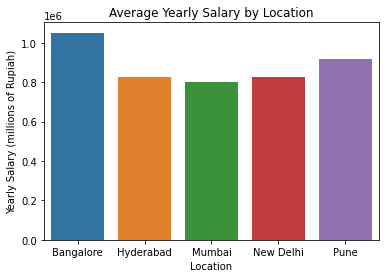

In [12]:
df_avgSalary_Location = df.groupby('Location')[['Yearly Salary (IDR)']].agg('mean').reset_index()
sb.barplot(x='Location', y='Yearly Salary (IDR)', data=df_avgSalary_Location)
plt.xlabel('Location')
plt.ylabel('Yearly Salary (millions of Rupiah)')
plt.title('Average Yearly Salary by Location')
plt.show()

<AxesSubplot:xlabel='Job Title'>

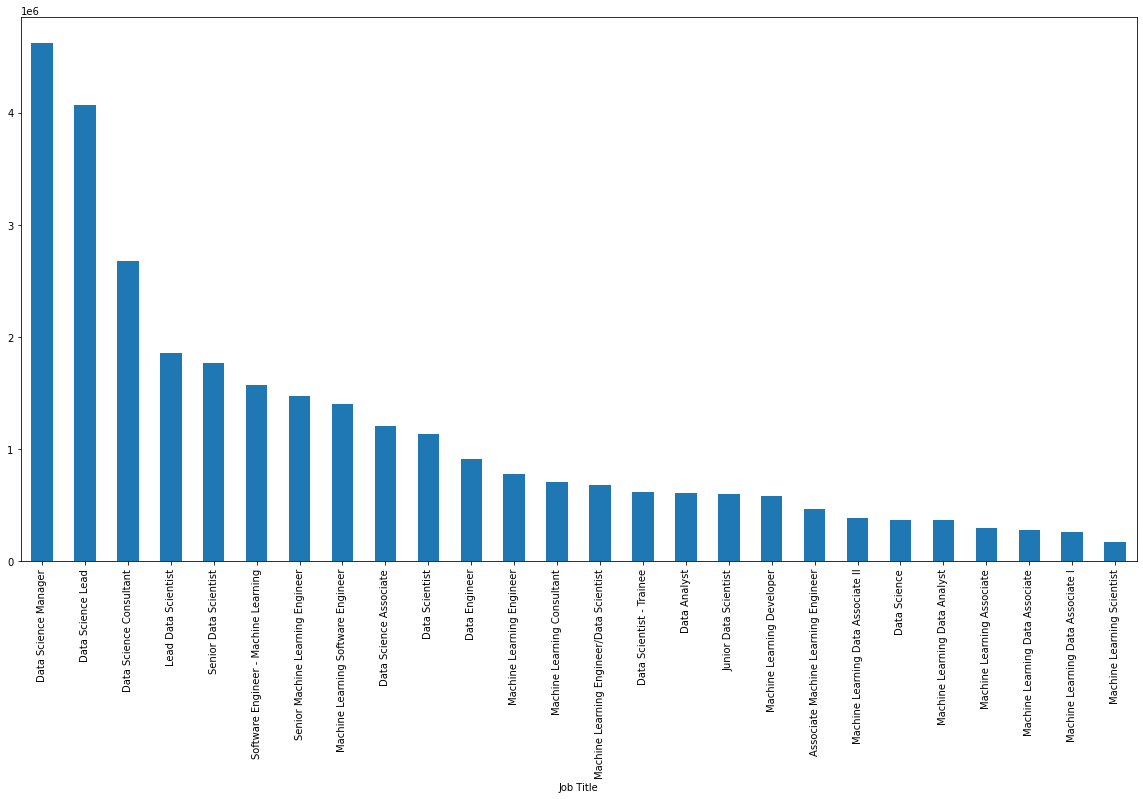

In [18]:
#df.info()
plt.figure(figsize=(20, 10))
df.groupby('Job Title')['Yearly Salary (IDR)'].mean().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:ylabel='Job Title'>

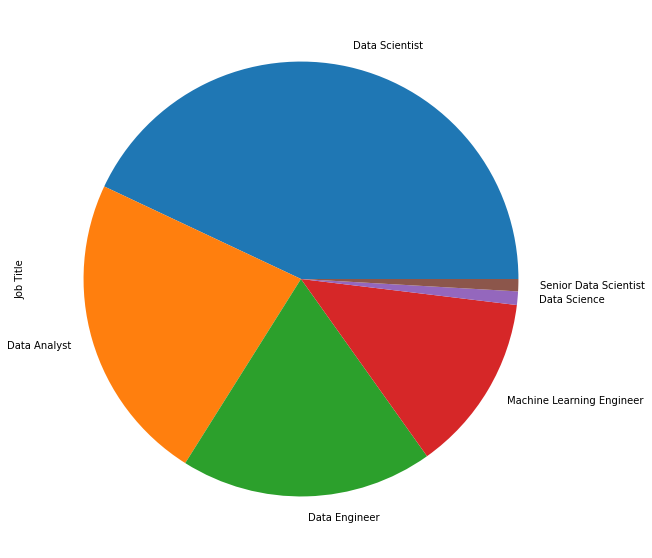

In [19]:
plt.figure(figsize=(10, 10))
top6jobs = df['Job Title'].value_counts().sort_values(ascending=False).head(6)
top6jobs.plot(kind='pie')

<AxesSubplot:xlabel='Company Name'>

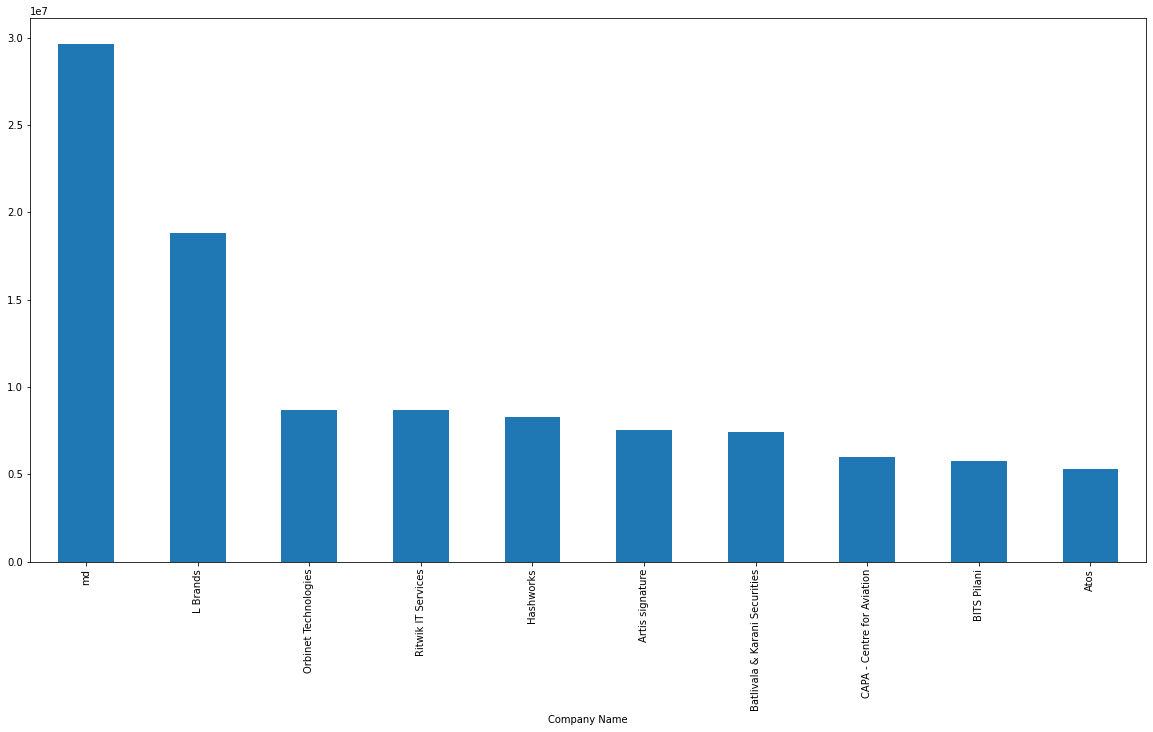

In [20]:
plt.figure(figsize=(20, 10))
df.groupby('Company Name').mean()['Yearly Salary (IDR)'].sort_values(ascending=False).head(10).plot(kind='bar')